# Petri Net Discovery: Sequencial Workflow Pattern 

## Step 1: Setup

In [1]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

## Step 2: Load Event Log from CSV

In [3]:
df = pd.read_csv("LE2_Sequential_LoopWF.csv", sep=';',parse_dates=["timestamp"])
df.head()

,timestamp,location,detailed_event_type,caseID
0,2025-11-05 12:02:00,other,START_LIGHT_PA,11/05/2025
1,2025-11-05 12:19:00,other,END_LIGHT_PA,11/05/2025
2,2025-11-05 13:00:00,home,notification_READ,11/05/2025
3,2025-11-05 13:00:00,home,stress_report_low,11/05/2025
4,2025-11-05 13:24:00,home,START_LIGHT_PA,11/05/2025


## Step 3: Prepare the Event Log
PM4Py expects specific column names. Let's rename them and sort the log by time within each case.

In [4]:
# Rename columns to PM4Py convention
df = df.rename(columns={
    "timestamp": "time:timestamp",
    "caseID": "case:concept:name",
    "detailed_event_type": "concept:name"
})

# Sort by case and time
df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values(by=["case:concept:name", "time:timestamp"])

## Step 4: Convert to PM4Py Event Log

In [5]:
from pm4py.objects.conversion.log import converter as log_converter

event_log = log_converter.apply(df, variant=log_converter.Variants.TO_EVENT_LOG)

## Step 5: Discover the Process Tree Using Inductive Miner

In [6]:
## Discover Process Model
# First get the process tree
process_tree = inductive_miner.apply(event_log)

# Visualize Process Tree
from pm4py.visualization.process_tree import visualizer as pt_visualizer
gviz_pt = pt_visualizer.apply(process_tree)
pt_visualizer.view(gviz_pt)



TypeError: '<' not supported between instances of 'float' and 'str'

## Step 6: Converting to Petri Net

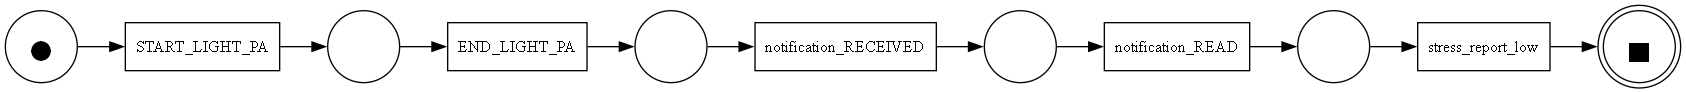

In [11]:
# Convert process tree to Petri net
from pm4py.objects.conversion.process_tree import converter as pt_converter
net, initial_marking, final_marking = pt_converter.apply(process_tree)

# Visualizing
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)